In [2]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

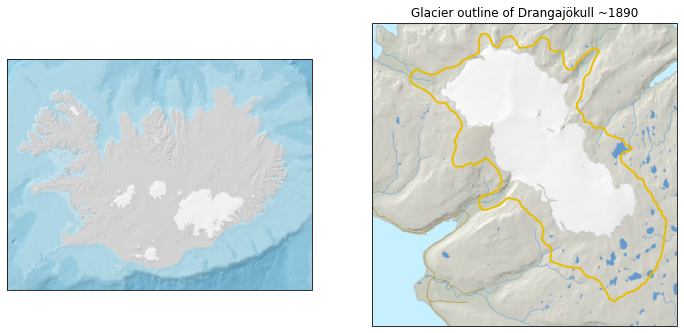

In [23]:
# we will create two images in different scales
# first image only addeds the basemap tiles
# second image zooms in to Drangajökull glacier and adds a WMS layer
# showing the estimated outline of the glacier at 1890

def main():
    
    # note that even tough
    IMO_basemap = cimgt.GoogleTiles(url="https://geo.vedur.is/geoserver/www/imo_basemap_epsg3857/{z}/{x}/{y}.png")
    
    fig = plt.figure(figsize=(12,12))
    
    # first image
    ax = fig.add_subplot(1, 2, 1, projection=IMO_basemap.crs)
    ax.set_extent([-25, -12.5, 67, 63])
    ax.add_image(IMO_basemap, 8)
    
    # second image, note wms_kwargs where we remove white backgound from wms layer and display above basemap
    ax = fig.add_subplot(1, 2, 2, projection=IMO_basemap.crs)
    ax.set_extent([-22.57, -21.95, 66, 66.25])
    ax.add_wms("https://geo.vedur.is/geoserver/wms",
               layers=["glaciology:glacieroutline_lia"],
               wms_kwargs={'transparent':True}, zorder=10)
    ax.add_image(IMO_basemap, 10)
    
    plt.title("Glacier outline of Drangajökull ~1890")

    plt.show()


if __name__ == '__main__':
    main()